In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./ml_source_files/vehicles.csv')
df.head(3)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [4]:
drop_col = ['Unnamed: 0', 'id', 'url', 'region_url', 'VIN', 'image_url',  'description','state', 'lat', 'long', 'posting_date']

In [5]:
df.drop(drop_col, axis=1, inplace=True)

In [6]:
df.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN


In [7]:
df['age'] = 2022 - df['year']
df.drop('year', axis=1, inplace=True)

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

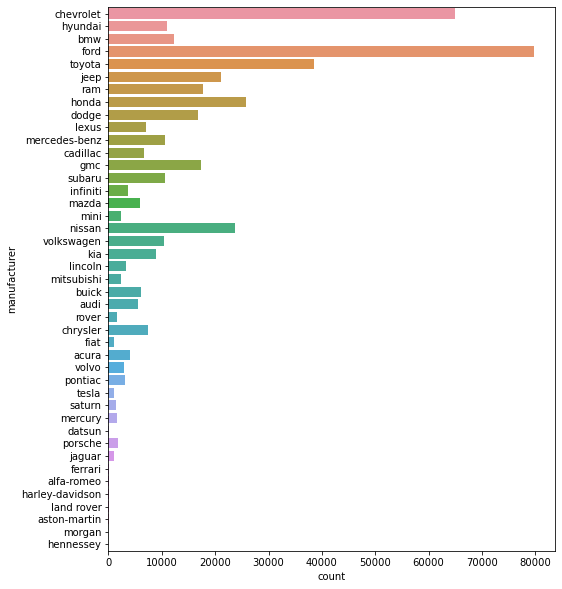

In [8]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='manufacturer', data=df)

<AxesSubplot:xlabel='count', ylabel='condition'>

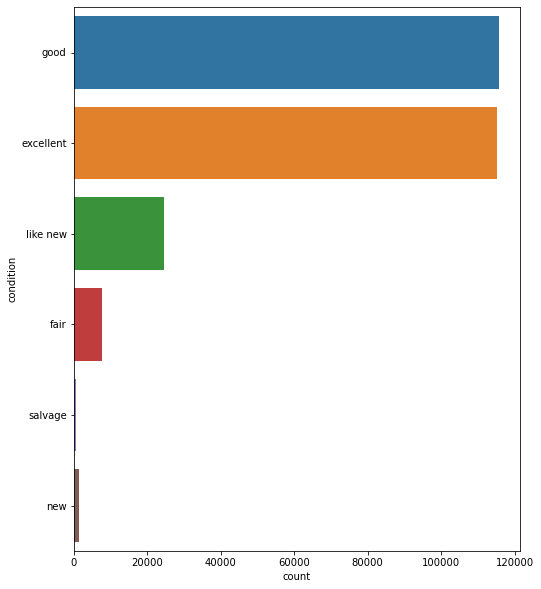

In [9]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='condition', data=df)

<AxesSubplot:xlabel='count', ylabel='fuel'>

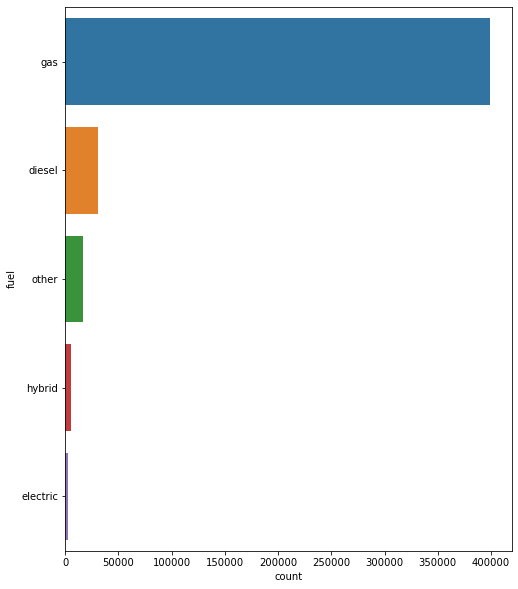

In [10]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='fuel', data=df)

<AxesSubplot:xlabel='count', ylabel='type'>

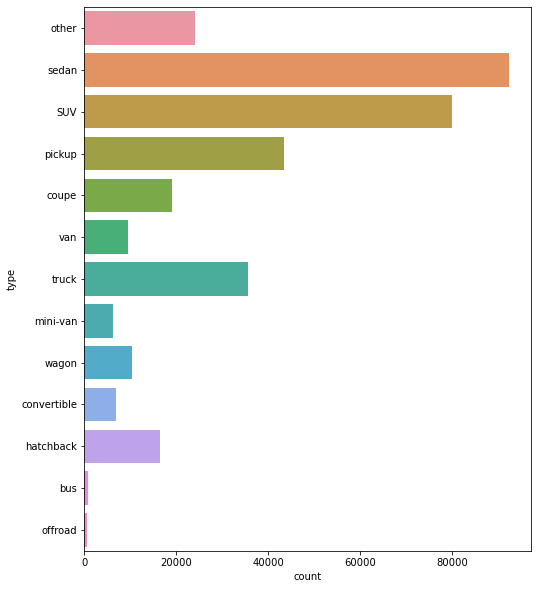

In [11]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='type', data=df)

<AxesSubplot:xlabel='count', ylabel='paint_color'>

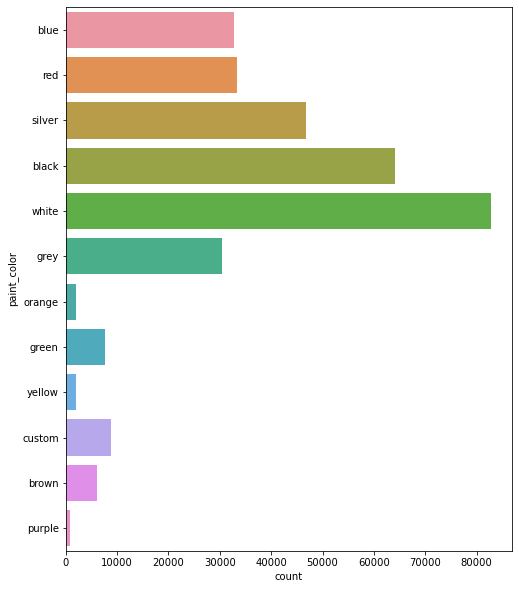

In [12]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='paint_color', data=df)

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

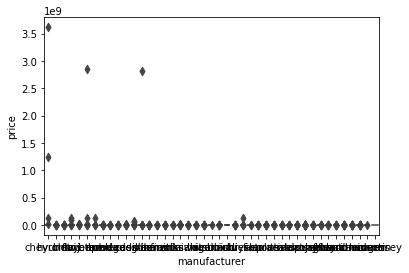

In [13]:
sns.boxenplot(x='manufacturer', y='price', data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  object 
 1   price         458213 non-null  int64  
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  age           457163 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 52.4+ MB


In [10]:
count = df['paint_color'].fillna('others').value_counts()

In [11]:
count

others    140843
white      82786
black      64145
silver     46722
red        33274
blue       32746
grey       30455
custom      8843
green       7631
brown       6028
yellow      2002
orange      1970
purple       768
Name: paint_color, dtype: int64

In [12]:
n_cat = 7
others = count.index[n_cat:]
others

Index(['custom', 'green', 'brown', 'yellow', 'orange', 'purple'], dtype='object')

In [13]:
df['manufacturer']

0         chevrolet
1           hyundai
2               bmw
3         chevrolet
4              ford
            ...    
458208     cadillac
458209      hyundai
458210     cadillac
458211         jeep
458212          NaN
Name: manufacturer, Length: 458213, dtype: object

In [14]:
df['paint_color'] = df['paint_color'].apply(lambda x:x if str(x) not in others else 'others')

In [15]:
df['paint_color'].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [16]:
df['paint_color'].fillna('others', inplace=True)

In [17]:
df['paint_color'].value_counts()

others    168085
white      82786
black      64145
silver     46722
red        33274
blue       32746
grey       30455
Name: paint_color, dtype: int64

In [18]:

df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [19]:
counts = df['manufacturer'].fillna('others').value_counts()
n_cat = 20
others = counts.index[n_cat:]
df['manufacturer'] = df['manufacturer'].apply(lambda x:x if str(x) not in others else 'others')

In [41]:
counts = df['model'].fillna('others').value_counts()
n_cat = 100
others = counts.index[n_cat:]
df['model'] = df['model'].apply(lambda x:x if str(x) not in others else 'others')

In [20]:
df['manufacturer'].value_counts()

ford             79666
chevrolet        64977
others           43214
toyota           38577
honda            25868
nissan           23654
jeep             21165
ram              17697
gmc              17267
dodge            16730
bmw              12352
hyundai          10975
mercedes-benz    10628
subaru           10510
volkswagen       10489
kia               8854
chrysler          7499
lexus             7119
cadillac          6743
buick             6009
Name: manufacturer, dtype: int64

In [21]:
df['manufacturer'].fillna('others', inplace=True)

In [24]:
model_count = df['manufacturer'].value_counts()
model_count = model_count > 100

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  object 
 1   price         458213 non-null  int64  
 2   manufacturer  458213 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   458213 non-null  object 
 14  age           457163 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 52.4+ MB


<AxesSubplot:>

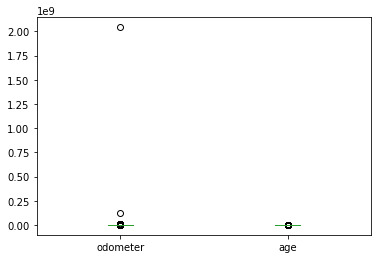

In [26]:
df[['odometer','age']].plot(kind='box')

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
sc = MinMaxScaler()

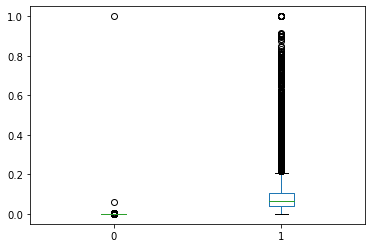

In [29]:
pd.DataFrame(sc.fit_transform(df[['odometer','age']])).plot(kind='box')
temp_df = pd.DataFrame(sc.fit_transform(df[['odometer','age']]))

In [32]:
# def remove_outlier(s):
#     qu25 = np.percentile(s, 25)
#     qu75 = np.percentile(s, 75)
#     iqr = qu75 - qu25
#     low_limit = qu25 - iqr*1.5
#     high_limit = qu75 + iqr*1.5
#     return (s >= low_limit) & (s <= high_limit)

In [30]:
remove_outlier(df['odometer']) & remove_outlier(df['age'])

NameError: name 'remove_outlier' is not defined

In [31]:
df = df[df.odometer.notnull()]
df = df[df.age.notnull()]

In [32]:
qu25 = np.percentile(df['odometer'], 25)
qu75 = np.percentile(df['odometer'], 75)
print(qu25, qu75)

41044.75 134177.0


In [33]:
iqr = qu75 - qu25
low_limit = qu25 - iqr*1.5
high_limit = qu75 + iqr*1.5
df = df[((df['odometer'] >= low_limit) & (df['odometer'] <= high_limit))]

In [34]:
qu25 = np.percentile(df['age'], 25)
qu75 = np.percentile(df['age'], 75)

iqr = qu75 - qu25
low_limit = qu25 - iqr*1.5
high_limit = qu75 + iqr*1.5
df = df[((df['age'] >= low_limit) & (df['age'] <= high_limit))]

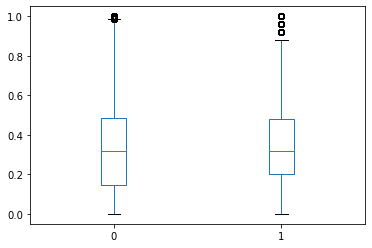

In [35]:
pd.DataFrame(sc.fit_transform(df[['odometer','age']])).plot(kind='box')
temp_df = pd.DataFrame(sc.fit_transform(df[['odometer','age']]))

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

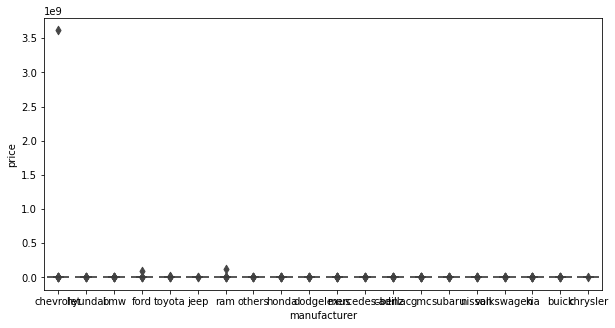

In [36]:
fig = plt.figure(figsize=(10,5))
sns.boxenplot(x='manufacturer', y='price', data=df)

KeyboardInterrupt: 

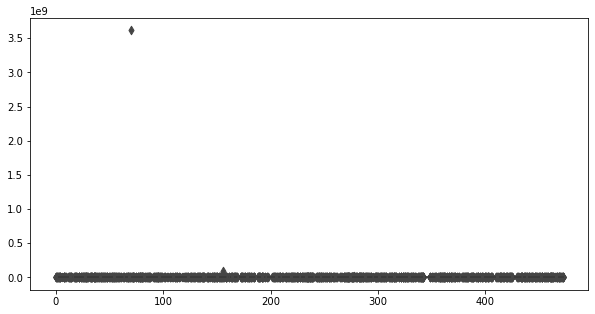

In [37]:
fig = plt.figure(figsize=(10,5))
sns.boxenplot(x='model', y='price', data=df)

<AxesSubplot:>

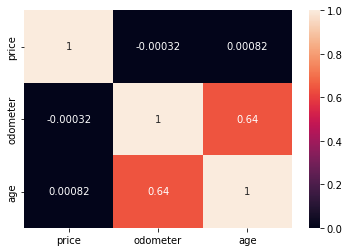

In [38]:
sns.heatmap(df.corr(), annot=True)

In [42]:
df.head(2)

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,others,12.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,others,8.0


In [44]:
df.isna().sum()

region               0
price                0
manufacturer         0
model             2466
condition       155436
cylinders       131295
fuel              2385
odometer             0
title_status      1672
transmission      1667
drive            95304
size            267761
type             71141
paint_color          0
age                  0
dtype: int64

In [45]:
df_d = df.dropna()

In [46]:
df_d.isna().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

In [47]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89439 entries, 4 to 458211
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        89439 non-null  object 
 1   price         89439 non-null  int64  
 2   manufacturer  89439 non-null  object 
 3   model         89439 non-null  object 
 4   condition     89439 non-null  object 
 5   cylinders     89439 non-null  object 
 6   fuel          89439 non-null  object 
 7   odometer      89439 non-null  float64
 8   title_status  89439 non-null  object 
 9   transmission  89439 non-null  object 
 10  drive         89439 non-null  object 
 11  size          89439 non-null  object 
 12  type          89439 non-null  object 
 13  paint_color   89439 non-null  object 
 14  age           89439 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 10.9+ MB


In [47]:
df_one = pd.get_dummies(df_d)

In [69]:
df_one.head(2)

,price,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,...,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
4,19500,116000.0,17.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,4900,177000.0,19.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
# 모델을 생성 예측, 평가

In [70]:
df_one.head(2)

,price,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,...,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
4,19500,116000.0,17.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,4900,177000.0,19.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
y = df_one.price
x = df_one.drop('price', axis=True)

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [74]:
std = MinMaxScaler()

std.fit(x_train)
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [76]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

In [77]:
from sklearn.metrics import classification_report, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
models = [lr, rid, las]

In [83]:
for m in models:
    m.fit(x_train_std, y_train)
    pred = m.predict(x_test_std)
    print(classification_report(y_test, pred))
#     print(r2_score(x_test_std, y_test))

              precision    recall  f1-score   support

  -2766336.0       0.00      0.00      0.00       0.0
  -2521344.0       0.00      0.00      0.00       0.0
  -2433024.0       0.00      0.00      0.00       0.0
  -2275328.0       0.00      0.00      0.00       0.0
  -2244096.0       0.00      0.00      0.00       0.0
  -2096640.0       0.00      0.00      0.00       0.0
  -2038784.0       0.00      0.00      0.00       0.0
  -1938432.0       0.00      0.00      0.00       0.0
  -1869824.0       0.00      0.00      0.00       0.0
  -1857024.0       0.00      0.00      0.00       0.0
  -1831680.0       0.00      0.00      0.00       0.0
  -1751040.0       0.00      0.00      0.00       0.0
  -1693696.0       0.00      0.00      0.00       0.0
  -1692160.0       0.00      0.00      0.00       0.0
  -1688064.0       0.00      0.00      0.00       0.0
  -1681920.0       0.00      0.00      0.00       0.0
  -1649664.0       0.00      0.00      0.00       0.0
  -1604608.0       0.00    

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [82]:
for m in models:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    pro = m.predict(x_test)
    print(classification_report(y_test, pred))
    print(r2_score(x_test, y_test))

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'